# Flight Prices EDA
<img src="https://images.unsplash.com/photo-1606768666853-403c90a981ad?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2071&q=80" width="730" height="730" align="left" style="border-radius: 5px;" />

A simple dataset taken from Kaggle for EDA about flight prices. This is my first EDA project in which I will be implementing data visualization for more comprehensive data representation as well as using Pandas library to clean and analyze data.

# Import libraries

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

# Import data

In [37]:
df = pd.read_excel('./data/data.xlsx')

# Data info

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape

(10683, 11)

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

# Data cleaning

In [10]:
df = df[['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price']]
df.sort_values('Price')
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302


In [32]:
# Drop null rows
df.isnull().sum()
df = df.dropna(axis=0)

In [80]:
# Convert duration to a datetime object
import re
from datetime import datetime

dates = df['Duration']
minutes_lst = []

for date in dates:
    # the result of splitting can lead to a single element list
    # or 2 elements list representing HOURS and MINUTES
    splitted = date.split(' ')
    
    if len(splitted) == 2:
        hours, minutes = splitted
        hours = int(re.sub(r'\D', '', hours))
        hours_to_minutes = hours * 60
        minutes = int(re.sub(r'\D', '', minutes))
        total_minutes = hours_to_minutes + minutes
        minutes_lst.append(total_minutes)
    else:
        hours = splitted[0]
        hours = int(re.sub(r'\D', '', hours))
        hours = hours * 60
        minutes_lst.append(hours)
        
df['Duration'] = minutes_lst
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

# Basic visualization

<AxesSubplot:>

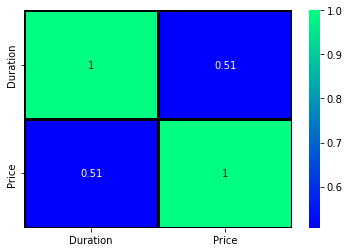

In [109]:
# Display a correlation between the duration time and the price
duration_price_corr = df[['Duration', 'Price', ]].corr()
sns.heatmap(
    duration_price_corr, 
    xticklabels=duration_price_corr.columns, 
    yticklabels=duration_price_corr.columns, 
    annot=True,
    cmap='winter',
    linecolor='black',
    linewidths=3
)

Text(0, 0.5, 'Price (USD)')

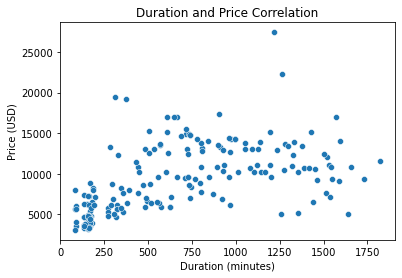

In [128]:
duration_price_scatterplot = sns.scatterplot(
    data=df[['Duration', 'Price']].head(n=200),
    x='Duration',
    y='Price',
)
duration_price_scatterplot.set_title('Duration and Price Correlation')
duration_price_scatterplot.set_xlabel('Duration (minutes)')
duration_price_scatterplot.set_ylabel('Price (USD)')